In [1]:
import pandas as pd


In [2]:
# general = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/general/job1_tweets_emotion_pysentimento.csv')
file_paths = ['job3_tweets_emotion_pysentimento.csv',
              'job2_tweets_emotion_pysentimento.csv',
              'job13_tweets_emotion_pysentimento.csv',
              'job4_tweets_emotion_pysentimento.csv',
              'job1_tweets_emotion_pysentimento.csv',
              'job12_tweets_emotion_pysentimento.csv',
              'job10_tweets_emotion_pysentimento.csv',
              'job11_tweets_emotion_pysentimento.csv',
              'job7_tweets_emotion_pysentimento.csv',
              'job5_tweets_emotion_pysentimento.csv',
              'job8_tweets_emotion_pysentimento.csv',
              'job6_tweets_emotion_pysentimento.csv',
              'job9_tweets_emotion_pysentimento.csv',
             'job18_tweets_emotion_pysentimento.csv']
OUTPUT_FILE_PATH = '/home/noaai/HCP_State_of_Mind_covid_19/new_code_for_artical/general_new/'
# Read each file into a DataFrame and store it in a list
dfs = [pd.read_csv(OUTPUT_FILE_PATH+file_path) for file_path in file_paths]

# Concatenate all the DataFrames into one
general = pd.concat(dfs, ignore_index=True)

In [3]:
def filter_emotion(df):
    df = df[['screen_name','joy_pys','sadness_pys','anger_pys','surprise_pys','disgust_pys','fear_pys','full_text','created_at']]#,'created_at'
    # df['date'] = pd.to_datetime(df['date'])
    return df


def replace_column_emotion(df):
    df.columns = df.columns.str.replace('_pys', '', regex=False)
    return df

In [ ]:
general = filter_emotion(general)
general = replace_column_emotion(general)
general

In [5]:
final_df_g = general

In [6]:
HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')

/tmp/ipykernel_52786/2204997096.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')


In [7]:
HPS = filter_emotion(HPS)
HPS = replace_column_emotion(HPS)

In [ ]:
unique_screen_names = pd.read_csv('active_h_90.csv')['screen_name'].tolist()
final_h = HPS[HPS['screen_name'].isin(unique_screen_names)]
final_h

In [9]:
from datetime import datetime
import numpy as np

def convert_date(date_str):
    try:
        date_obj = datetime.strptime(str(date_str), '%a %b %d %H:%M:%S %z %Y')
        return date_obj.strftime('%Y-%m-%d %H:%M:%S')
    except (ValueError, TypeError):
        return np.nan
    
def convert_date_df(df):
    df['date'] = df['created_at'].apply(convert_date)
    df = df.dropna(subset=['date'])
    df['date'] = pd.to_datetime(df['date'])

    # Create 'year' and 'month' columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df

In [10]:
final_h = convert_date_df(final_h)
final_df_g = convert_date_df(final_df_g)

/tmp/ipykernel_52786/2726881660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['created_at'].apply(convert_date)


In [12]:
cleaned_df_g = final_df_g.dropna(subset=['full_text'])


In [13]:
# Group by 'year' and 'month' and count the tweets
monthly_tweet_counts_HPS = final_h.groupby(['year', 'month'])['full_text'].count().rename('HCPs')

# # Reset the index to convert the series into a dataframe
# monthly_tweet_counts_HPS = monthly_tweet_counts_HPS.reset_index()

# To merge this with another dataframe (e.g., 'monthly_tweet_counts_general' which should be prepared similarly),
# you would need to make sure the other dataframe is also in the same format
monthly_tweet_counts_general = final_df_g.groupby(['year', 'month'])['full_text'].count().rename('non-HCPs')


In [14]:
# Convert the Series to DataFrames and rename the columns
df_HPS = monthly_tweet_counts_HPS.reset_index().rename(columns={'full_text': 'HCPs'})
df_g = monthly_tweet_counts_general.reset_index().rename(columns={'full_text': 'non-HCPs'})

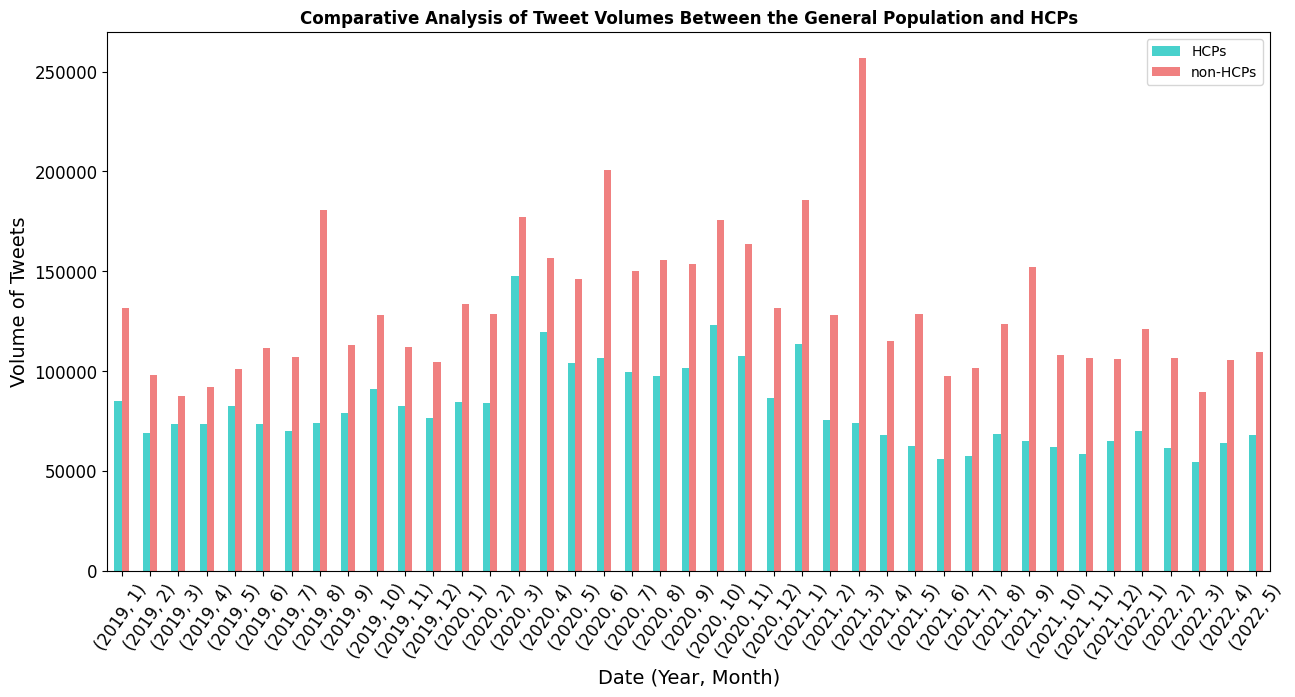

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the two DataFrames
df = pd.merge(df_HPS, df_g, on=['year', 'month'])

# Set the year and month as the index
df.set_index(['year', 'month'], inplace=True)

# Plot the DataFrame
df.plot(kind='bar', figsize=(15, 7), color=['mediumturquoise', 'lightcoral'])
plt.xticks(rotation=55)
plt.gca().tick_params(axis='x', labelsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

plt.title('Comparative Analysis of Tweet Volumes Between the General Population and HCPs', weight='bold')
plt.xlabel('Date (Year, Month)', fontsize=14)
plt.ylabel('Volume of Tweets', fontsize=14)
plt.show()

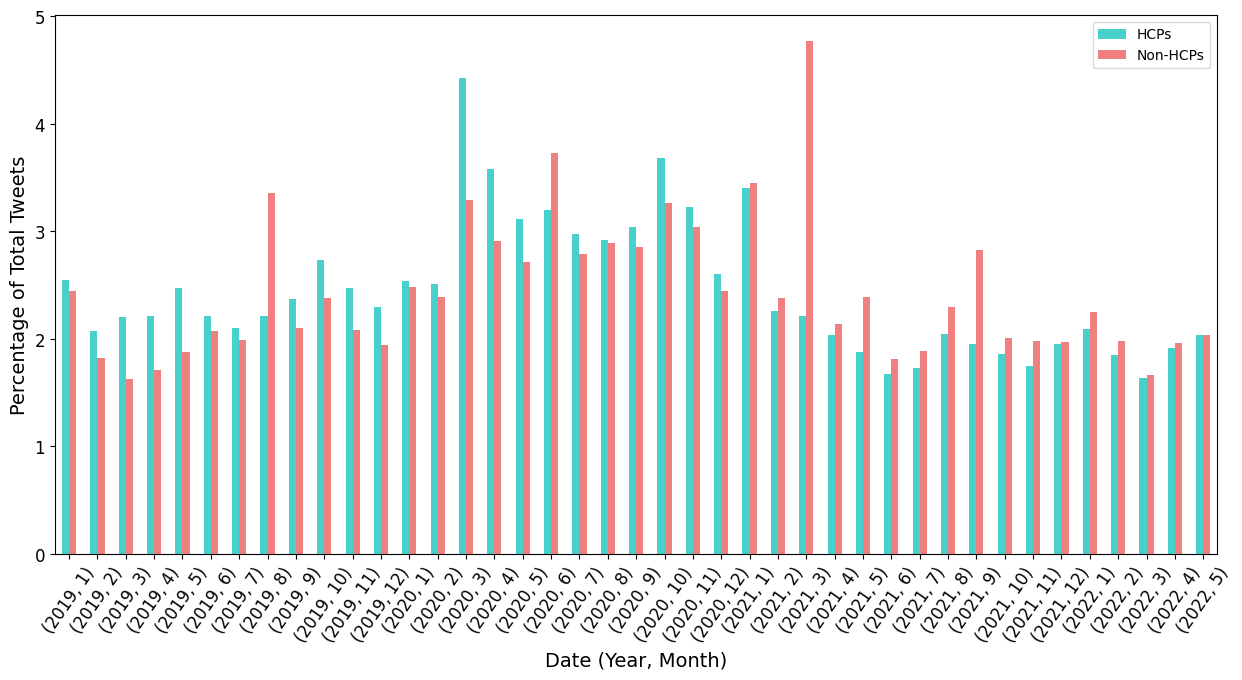

In [16]:
# Add a column for total tweets per month
df['total_tweets'] = df['HCPs'] + df['non-HCPs']

# Calculate the percentage of tweets for HCPs and non-HCPs
df['HCPs_percent'] = (df['HCPs'] / df['HCPs'].sum()) * 100
df['non-HCPs_percent'] = (df['non-HCPs'] / df['non-HCPs'].sum()) * 100

# Plot the DataFrame showing percentages
df[['HCPs_percent', 'non-HCPs_percent']].plot(kind='bar', figsize=(15, 7), color=['mediumturquoise', 'lightcoral'])
plt.xticks(rotation=55)
plt.gca().tick_params(axis='x', labelsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

# plt.title('Comparative Analysis of Tweet Volumes Between the General Population and HCPs (as Percentages)', weight='bold')
plt.xlabel('Date (Year, Month)', fontsize=14)
plt.ylabel('Percentage of Total Tweets', fontsize=14)
plt.legend(labels=['HCPs', 'Non-HCPs'])
# plt.savefig('tweet_volumes_comparison.png')
plt.show()


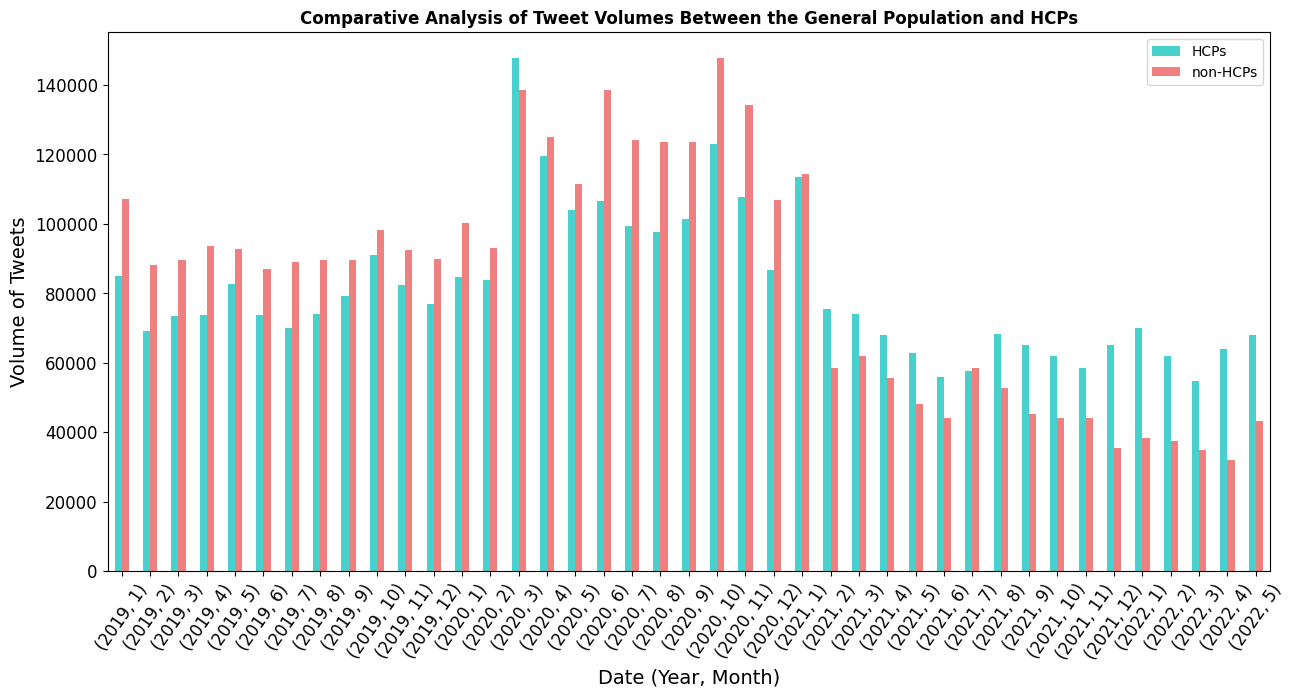

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the two DataFrames
df = pd.merge(df_HPS, df_g, on=['year', 'month'])

# Set the year and month as the index
df.set_index(['year', 'month'], inplace=True)

# Plot the DataFrame
df.plot(kind='bar', figsize=(15, 7), color=['mediumturquoise', 'lightcoral'])
plt.xticks(rotation=55)
plt.gca().tick_params(axis='x', labelsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

plt.title('Comparative Analysis of Tweet Volumes Between the General Population and HCPs', weight='bold')
plt.xlabel('Date (Year, Month)', fontsize=14)
plt.ylabel('Volume of Tweets', fontsize=14)
plt.show()


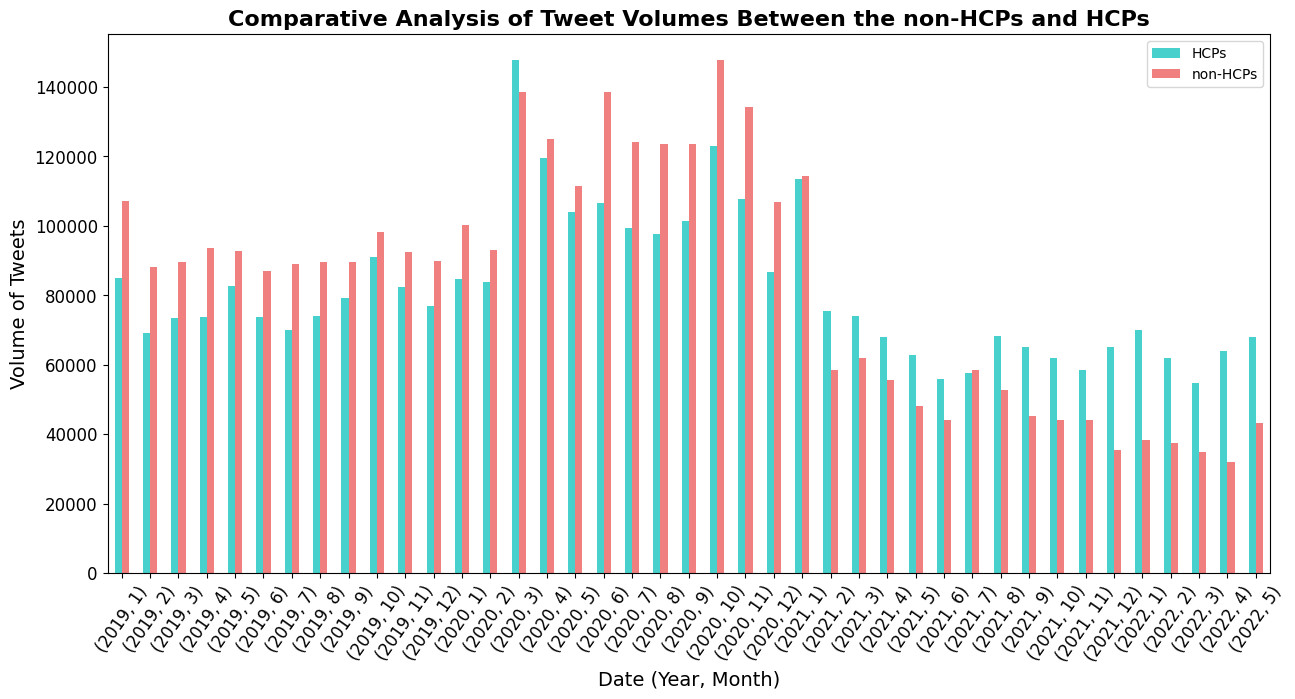

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the two DataFrames
df = pd.merge(df_HPS, df_g, on=['year', 'month'])

# Set the year and month as the index
df.set_index(['year', 'month'], inplace=True)

# Plot the DataFrame
df.plot(kind='bar', figsize=(15, 7), color=['mediumturquoise', 'lightcoral'])
plt.xticks(rotation=55)

# Adjust title and axis labels with increased font size
plt.title('Comparative Analysis of Tweet Volumes Between the non-HCPs and HCPs', fontsize=16, weight='bold')
plt.xlabel('Date (Year, Month)', fontsize=14)
plt.ylabel('Volume of Tweets', fontsize=14)
plt.gca().tick_params(axis='x', labelsize=12)
plt.gca().tick_params(axis='y', labelsize=12)

# Increase the font size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('tweet_volume_comparison.png', dpi=300, bbox_inches='tight')

plt.show()


In [29]:
df

,HCPs,non-HCPs
date,,
2019-01-01,85078,107135
2019-02-01,69075,88130
2019-03-01,73467,89555
2019-04-01,73738,93516
2019-05-01,82653,92826
2019-06-01,73828,87095
2019-07-01,70052,89151
2019-08-01,73918,89594
2019-09-01,79098,89501


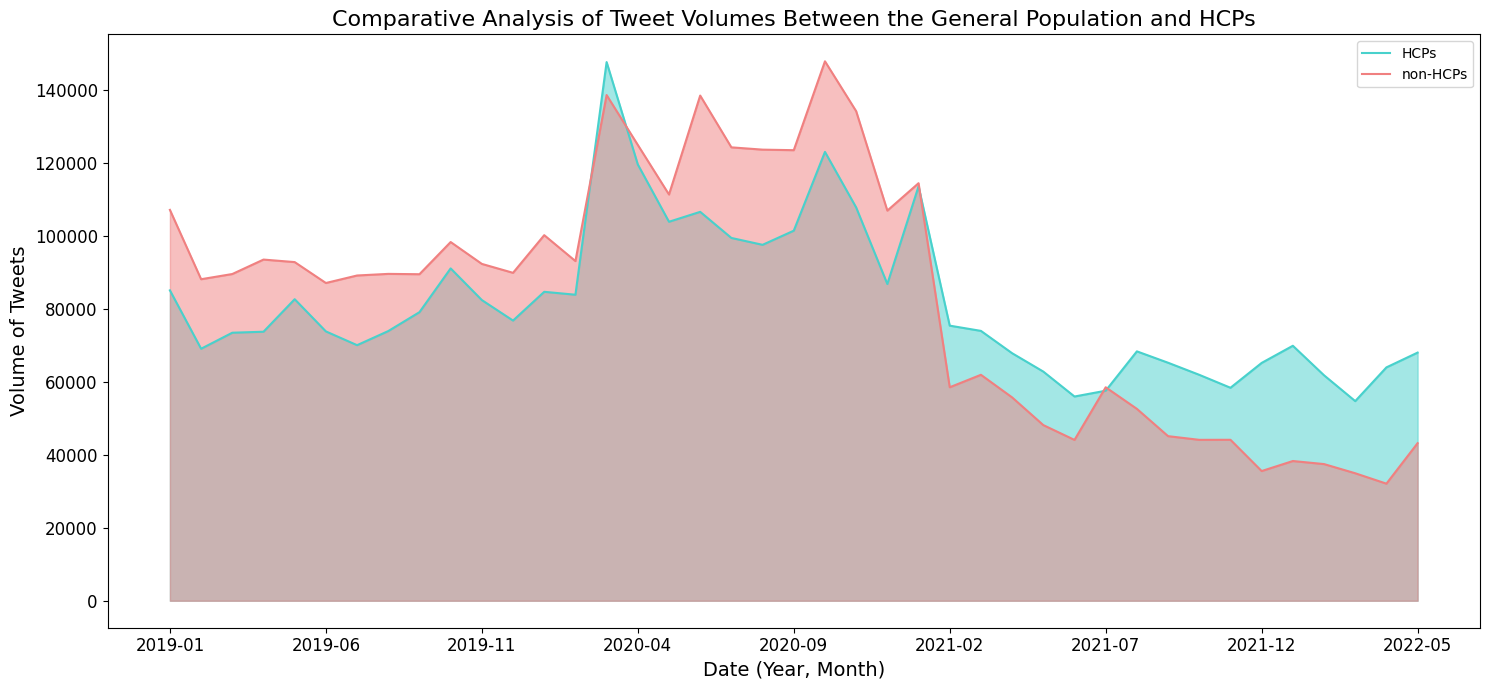

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the two DataFrames
df = pd.merge(df_HPS, df_g, on=['year', 'month'])

# Convert 'year' and 'month' to a datetime format for better plotting
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Convert the datetime 'date' to a string format 'YYYY-MM'
df['date_str'] = df['date'].dt.strftime('%Y-%m')

# Set the new string date as the index
df.set_index('date_str', inplace=True)

# Drop the 'year', 'month', and 'date' columns if they are no longer needed
df.drop(['year', 'month', 'date'], axis=1, inplace=True)

# Plot the DataFrame as a line plot
fig, ax = plt.subplots(figsize=(15, 7))
for column, color in zip(df.columns, ['mediumturquoise', 'lightcoral']):
    df[column].plot(kind='line', ax=ax, color=color, label=column)
    ax.fill_between(df.index, 0, df[column], color=color, alpha=0.5)

# plt.xticks(rotation=45, ha='right')

plt.title('Comparative Analysis of Tweet Volumes Between the General Population and HCPs', fontsize=16)
plt.xlabel('Date (Year, Month)', fontsize=14)
plt.ylabel('Volume of Tweets', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.tight_layout()
plt.show()
